In [43]:
import pandas as pd
df = pd.read_csv('../datafiles/ls_midir.csv')
df

,obsid,lonstart,lonend,wavenum,wavepower,fap,date
0,jcf109114,165,526,[0.19944598337950137 0.5983379501385041 0.997...,[1.307830603848671 1.3049610462582806 0.83438...,[1.2173077430578142e-130 4.298050606805272e-1...,10-Jun-30
1,jcf160163,273,634,[0.19944598337950137 0.5983379501385041 0.997...,[1.1858588288549752 1.1816035277429195 0.7522...,[6.884989086738569e-102 1.1602730125598648e-9...,10-Jun-30
2,jcf165170,352,714,[0.19889502762430938 0.5966850828729282 0.994...,[1.1292666376104075 1.1248140153542978 0.7128...,[1.4786247481907018e-91 1.5015234034507998e-8...,10-Jun-30
3,jcf109114,165,526,[0.19944598337950137 0.5983379501385041 0.997...,[1.307830603848671 1.3049610462582806 0.83438...,[1.2173077430578142e-130 4.298050606805272e-1...,10-Jun-30
4,jcf160163,273,634,[0.19944598337950137 0.5983379501385041 0.997...,[1.1858588288549752 1.1816035277429195 0.7522...,[6.884989086738569e-102 1.1602730125598648e-9...,10-Jun-30
...,...,...,...,...,...,...,...
205,jcf010015,21,380,[0.20055710306406685 0.6016713091922006 1.002...,[1.2597770744964425 1.251078774320218 0.80951...,[4.8442596067622945e-119 3.544009568702164e-1...,9-Aug-27
206,jcf117122,116,478,[0.19889502762430938 0.5966850828729282 0.994...,[1.4114053229784103 1.4075332137935255 0.9022...,[2.0783044156741194e-159 4.791828301158632e-1...,9-May-28
207,jcf117122,116,478,[0.19889502762430938 0.5966850828729282 0.994...,[1.4114053229784103 1.4075332137935255 0.9022...,[2.0783044156741194e-159 4.791828301158632e-1...,9-May-28
208,jcf057062,169,528,[0.20055710306406685 0.6016713091922006 1.002...,[1.2804033248881723 1.2797952984278034 0.8246...,[2.0781233147246965e-126 9.84377835606025e-12...,9-May-28


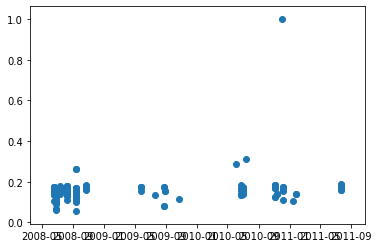

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
wpowers = [float(powerlist.replace('[', '').strip(']').split(' ')[1]) for powerlist in df[' wavepower'].tolist()]
normedwpowers = np.array(wpowers) / np.max(wpowers)
plt.scatter([datetime.strptime(date.lower().zfill(9), '%y-%b-%d') for date in df['date'].tolist()], 
            normedwpowers)

In [47]:
df['normedpeakwavepower'] = normedwpowers

In [50]:
df.to_csv('../datafiles/ls_midir.csv')

In [32]:
#08/19/2020: creating obs groups for 2017 observations
from datetime import datetime, timedelta
midirtable = open('../misc/2017.txt', 'r')
badstrs = ['junk', 'mu']
goodstrs = ['jc', 'jf']
dates = []
fpaths = []
for line in midirtable.readlines():
    fpath = line.strip().split(' ')[0]
    if fpath[:5] == '/prvt' and not True in [badstr in fpath.lower() for badstr in badstrs] and True in [goodstr in fpath.split('/')[-1].lower() for goodstr in goodstrs] and 'cmap' in fpath:
        farr = fpath.split('/')
        dates.append(datetime.strptime(farr[farr.index('comics')+1], '%Y%b%d'))
        fpaths.append(fpath)
            
zipped = zip(dates, fpaths)
zipped = sorted(zipped)
filetxts = []
fileds = []

startdate = zipped[0][0]
currtxt = zipped[0][1]
for item in zipped:
    if item[0] - startdate <= timedelta(days=2):
        currtxt += '\n' + item[1]
    else:
        filetxts.append(currtxt)
        fileds.append(datetime.strftime(startdate, '%y%b%d'))
        startdate = item[0]
        currtxt = item[1]
filetxts[0]

'/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/Cal_jcf05030511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/Cal_jcf05030511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/Cal_jcf517523.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/cal_jcf05030511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/cal_jcf517523.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/finalCalcal_jcf05030511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/finalCalcal_jcf517523.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/jcf009659009665_fixed.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/jcf009659009665_perfected.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/jcf05030511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/jcf517523.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archive/reduc_2016/Cal_jc_505511.cmap.gz\n/prvt/cirs12/comics/2011aug27/17.65/jupiter/archiv

In [34]:
for i in range(len(filetxts)):
    outfile = open('midirfiles/2017/'+fileds[i]+'_17.65.txt', 'w')
    outfile.write(filetxts[i])
    outfile.close()